<h1>1 Exploratory Data Analysis (EDA)</h1>

<h2>1.1 Dataset overview</h2>
<p>The Abalone dataset contains physical measurements of marine mollusks.</p>
<p>The goal is to analyze the dataset structure and relationships between features prior to applying machine learning models.</p>

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df = pd.read_csv("../data/raw/abalone.csv")

df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

<p>The dataset consists of 9 columns (attributes/features) and 4,177 rows (instances).</p>
<p>The target variable is the Rings column, which represents the number of rings on the abalone.</p>

<h2>1.2 Data types & missing values</h2>

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<p>The only categorical attribute is Sex (the abalone’s sex), while all other attributes are numerical.</p>
<p>Among the numerical attributes, all are real-valued except the target variable Rings, which is an integer.</p>

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<p>The dataset does not contain missing values, which simplifies preprocessing.</P>

<h2>1.3 Target variable analysis (Rings)</h2>

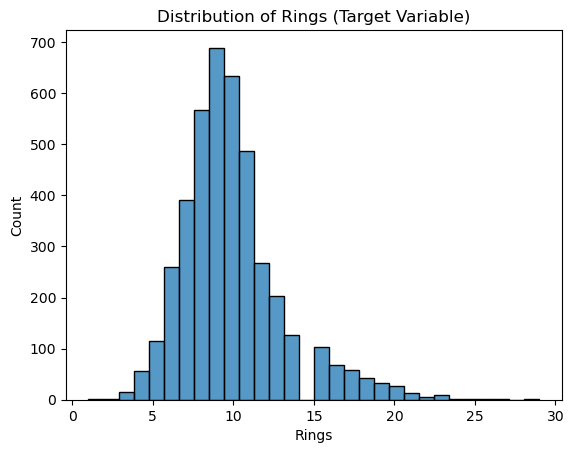

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Rings"], bins=30)
plt.title("Distribution of Rings (Target Variable)")
plt.show()

In [9]:
df["Rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

In [10]:
print(df["Rings"].skew())

1.114101898355677


<p>The target variable Rings ranges from 1 to 29, with the majority of observations concentrated between 8 and 11 rings. The median value is 9, while the mean is approximately 9.93, indicating that most samples are centered around lower to mid-range values, with a smaller number of observations corresponding to much older abalones.</p>

<p>The distribution of Rings exhibits a slight right (positive) skewness, which is evident both from the histogram and from the fact that the mean is greater than the median (row named 50% in the table alove), or by the value returned from the skew function when called on column Rings. This indicates the presence of a longer tail toward higher ring counts, representing older individuals that appear less frequently in the dataset.</p>

<h2>1.4 Feature distribution</h2>

In [11]:
numerical_features=df.drop(columns=["Sex","Rings"]).columns
categorical_features=["Sex"]

summary = []
for col in numerical_features:
        summary.append({
            "Feature": col,
            "Mean": df[col].mean(),
            "Median": df[col].median(),
            "Mode": df[col].mode().iloc[0] 
        })

pd.DataFrame(summary)

Feature      Mean  Median    Mode
0          Length  0.523992  0.5450  0.5500
1        Diameter  0.407881  0.4250  0.4500
2          Height  0.139516  0.1400  0.1500
3    Whole weight  0.828742  0.7995  0.2225
4  Shucked weight  0.359367  0.3360  0.1750
5  Viscera weight  0.180594  0.1710  0.1715
6    Shell weight  0.238831  0.2340  0.2750

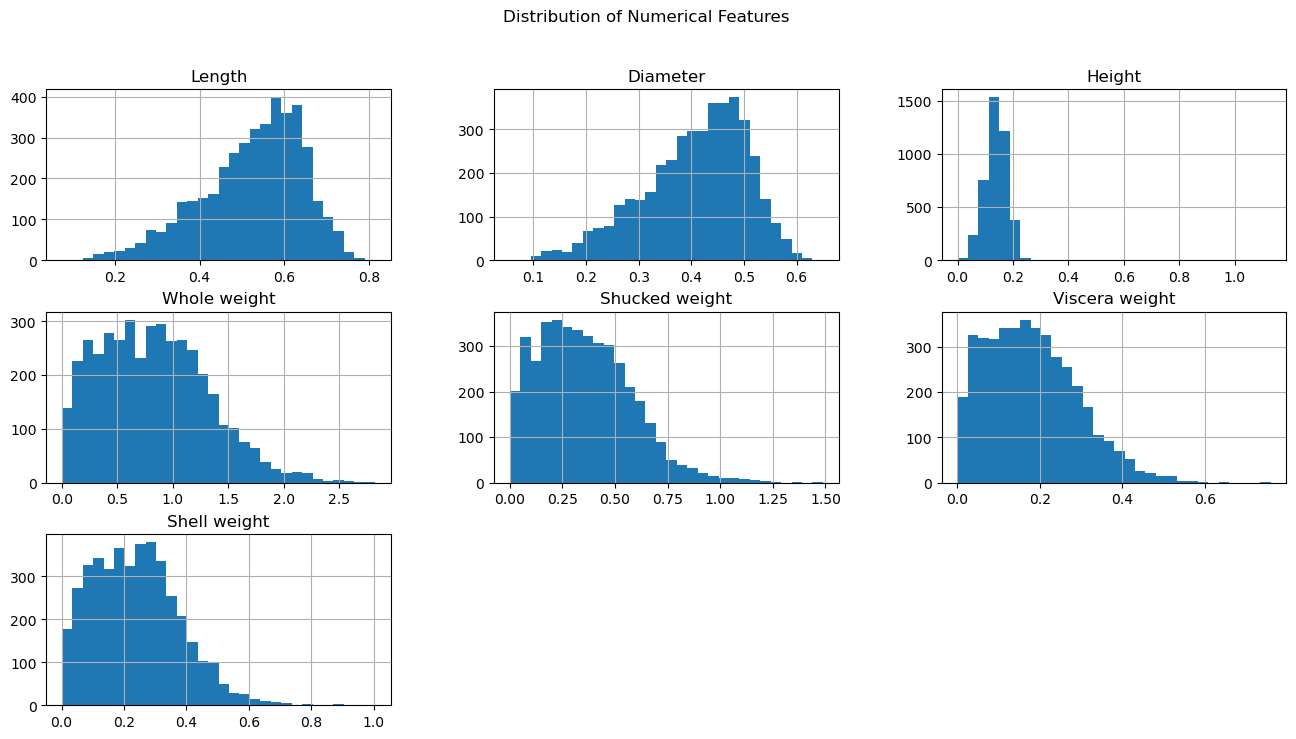

In [12]:
df[numerical_features].hist(figsize=(16, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [13]:
skewness = df[numerical_features].skew()

print("Skewness of numerical features:")
for feature, skew in skewness.items():
    print(f"{feature}: {skew}")

Skewness of numerical features:
Length: -0.639873268981801
Diameter: -0.6091981423290918
Height: 3.1288173790659615
Whole weight: 0.5309585632523087
Shucked weight: 0.7190979217612694
Viscera weight: 0.5918521514155083
Shell weight: 0.6209268251392077


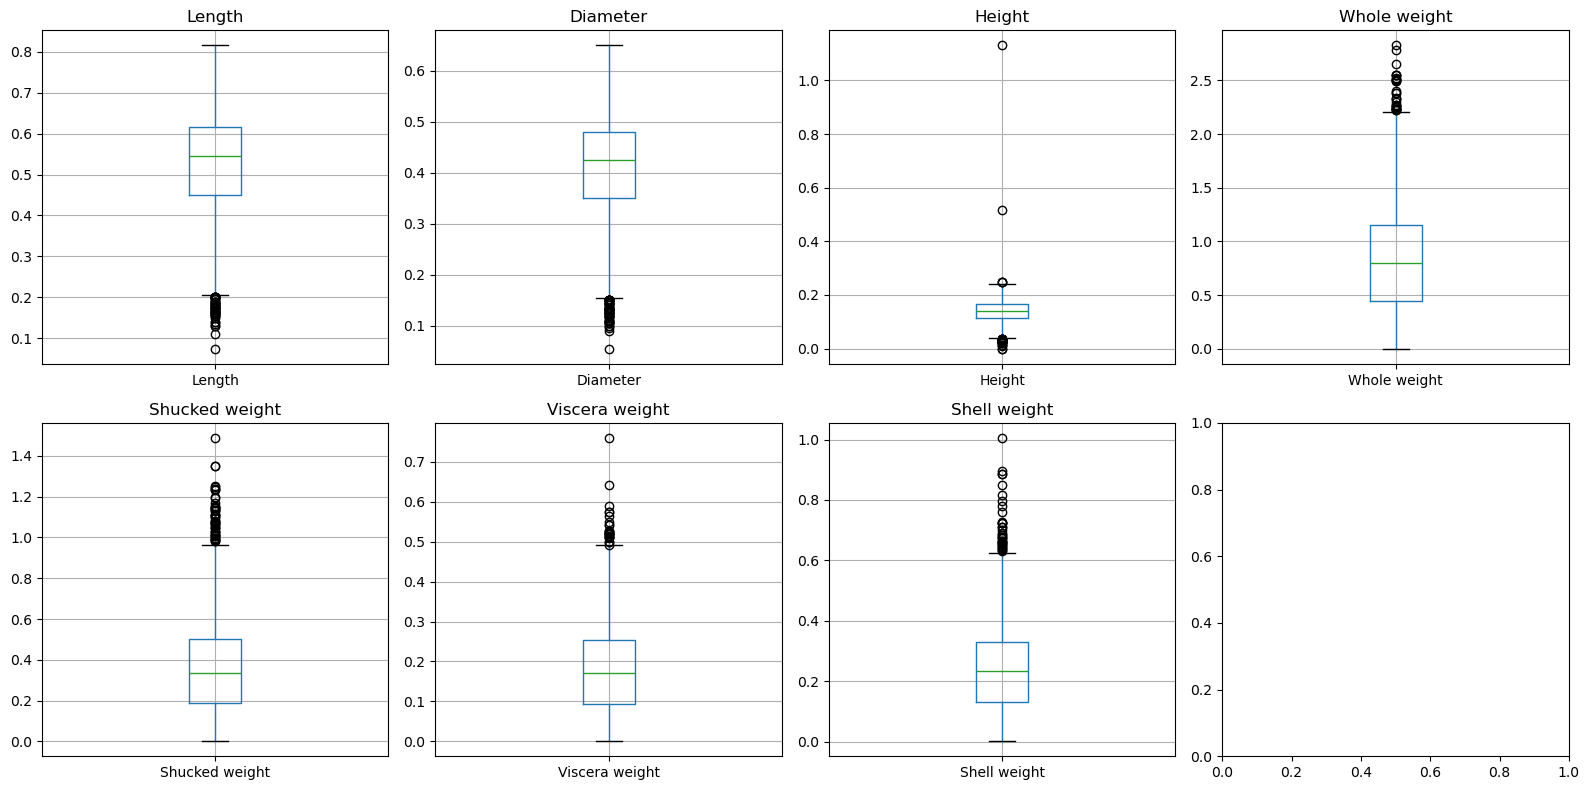

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, col in zip(axes, numerical_features):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()



<p>Histograms  reveal that the size-related features (Length and Diameter), have distributions that are mostly symmetric, with only slight asymmetry caused by their natural biological limits. On the other hand, Height and all weight-related features show clear right (positive) skewness, meaning that most values are concentrated at lower levels while a smaller number of observations extend toward higher values, creating long right tails and possible outliers.</p>

<p>Because the numerical features have different ranges and some are skewed, feature scaling is needed when using machine learning models that are sensitive to feature magnitude, such as linear models and distance-based algorithms. In contrast, tree-based models are generally more robust to skewed distributions and outliers and are therefore less affected by these characteristics.</p>

<p>Boxplots reveal the presence of several high and low value outliers, particularly in weight-based variables, suggesting the need for robust scaling or transformation. </p>

<h2>1.5 Categorical feature (Sex)</h2>

In [15]:
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [16]:
sex_percentages= df["Sex"].value_counts(normalize=True)*100

sex_percentages

Sex
M    36.581278
I    32.128322
F    31.290400
Name: proportion, dtype: float64

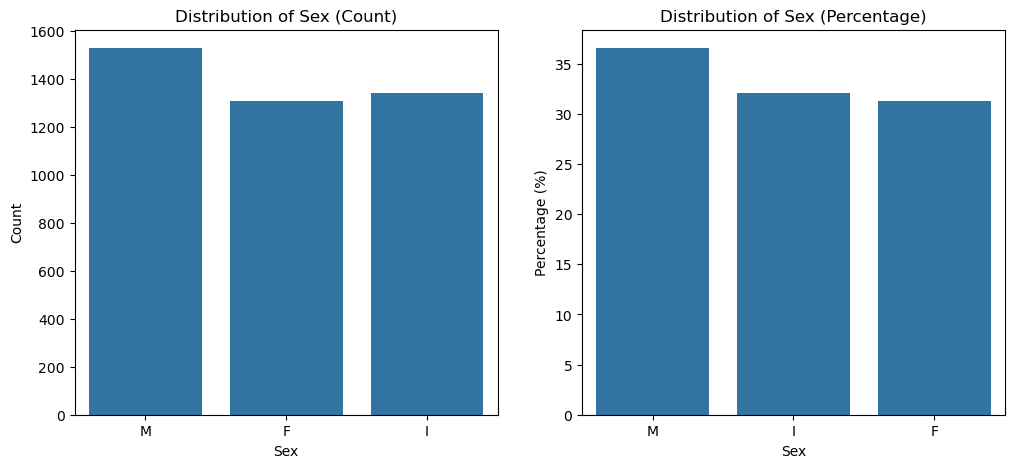

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x="Sex", data=df, ax=axes[0])
axes[0].set_title("Distribution of Sex (Count)")
axes[0].set_ylabel("Count")

sns.barplot(
    x=sex_percentages.index,
    y=sex_percentages.values,
    ax=axes[1]
)
axes[1].set_title("Distribution of Sex (Percentage)")
axes[1].set_ylabel("Percentage (%)")


plt.show()

<p>Categorical attribute Sex has three unique values: M (male), F (female), I (Infant).</p>
<p>The distribution of these values is a bit uneven, where almost 37% of abalones are males, while infants and females are closer to 31% and 32% respetivley. The differences between categories are small and should not significantly affect model performance.</p>

<h2>1.6 Feature Correlation</h2>

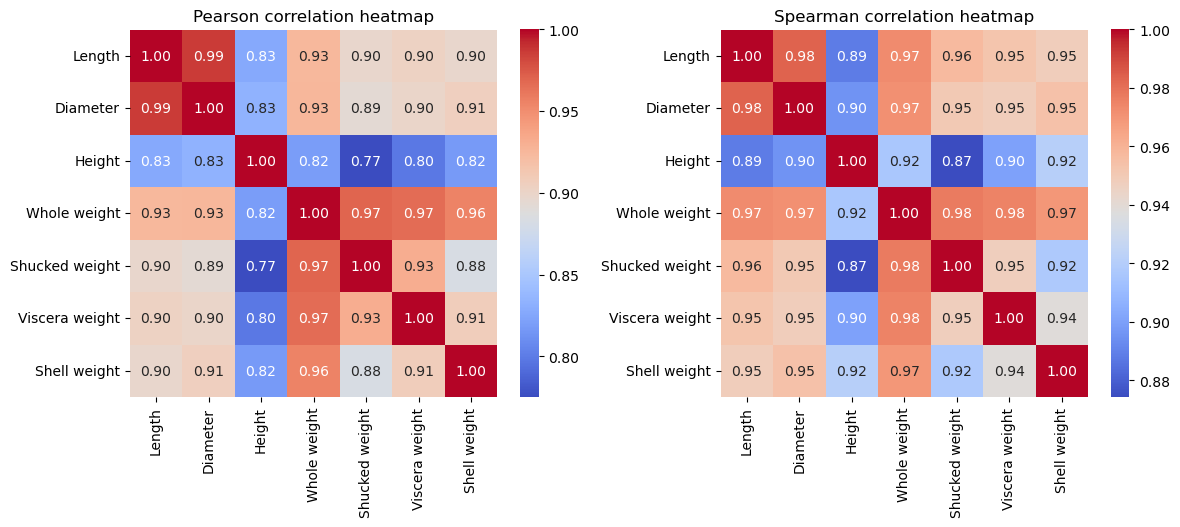

In [18]:
pearson = df[numerical_features].corr(method='pearson')
spearman = df[numerical_features].corr(method='spearman')


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[0])
axes[0].set_title('Pearson correlation heatmap')

sns.heatmap(spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True,ax=axes[1])
axes[1].set_title('Spearman correlation heatmap')

plt.tight_layout()
plt.show()

<p>Pearson correlation measures linear relationships between numerical features, while Spearman correlation captures monotonic relationships based on rank. Displaying both heatmaps side by side allows a direct comparison of linear and nonlinear dependencies among features.Pearson correlation measures linear relationships between numerical features, while Spearman correlation captures monotonic relationships based on rank. Displaying both heatmaps side by side allows a direct comparison of linear and nonlinear dependencies among features.</p>

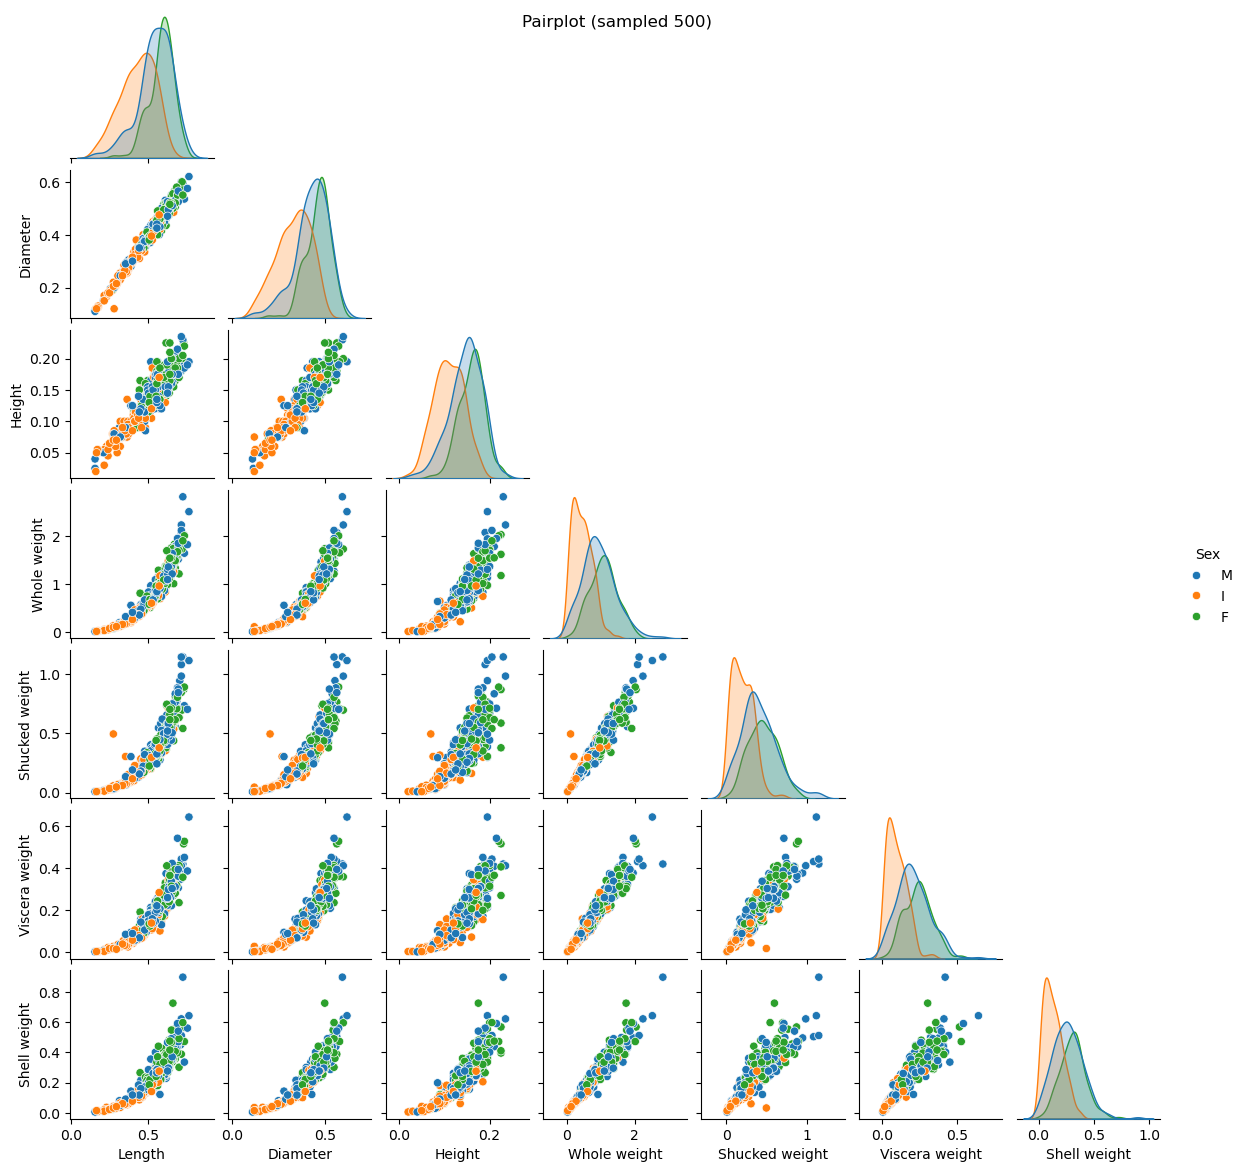

In [19]:

sample = df.sample(n=500, random_state=0) 
sns.pairplot(sample, vars=numerical_features, hue='Sex', diag_kind='kde', corner=True, height=1.7)
plt.suptitle('Pairplot (sampled 500)')
plt.show()

<p>The pairplot visualizes pairwise relationships between numerical features, with points colored according to the categorical variable Sex. Diagonal plots show the distribution of each feature, while off-diagonal plots illustrate relationships between feature pairs. The plot reveals strong correlations among size and weight related features and shows that infant abalones tend to cluster at lower values compared to adults, while male and female abalones largely overlap.</p>
<p>The pairplot reveals that several numerical features exhibit strong linear relationships, particularly among size and weight related attributes. The relationship between Length and Diameter is highly linear, as shown by the narrow, elongated scatter pattern, indicating that these two measurements increase proportionally. Similarly, the weight-related features, such as Whole weight, Shucked weight, Viscera weight, and Shell weight, display strong linear correlations with each other, suggesting that they capture closely related physical properties of the abalone.</p>
<p>In contrast, some feature pairs show nonlinear but monotonic relationships. Notably, the relationship between Height and Whole weight, as well as between Height and other weight-related features, is clearly nonlinear. In these cases, the scatter plots exhibit a curved pattern, where Whole weight increases more rapidly for larger Height values, indicating that the rate of change is not constant. This nonlinear behavior is consistent with the physical interpretation of weight depending on volume rather than a single linear dimension</p>
<p>Due to the large number of features, a random subset of 500 samples was used to improve readability and performance.</p>

<h2>1.7 Corelation with target variable Rings</h2>

In [20]:
df.groupby("Sex")["Rings"].agg(["mean", "median", "std", "count"])

mean  median       std  count
Sex                                    
F    11.129304    10.0  3.104256   1307
I     7.890462     8.0  2.511554   1342
M    10.705497    10.0  3.026349   1528

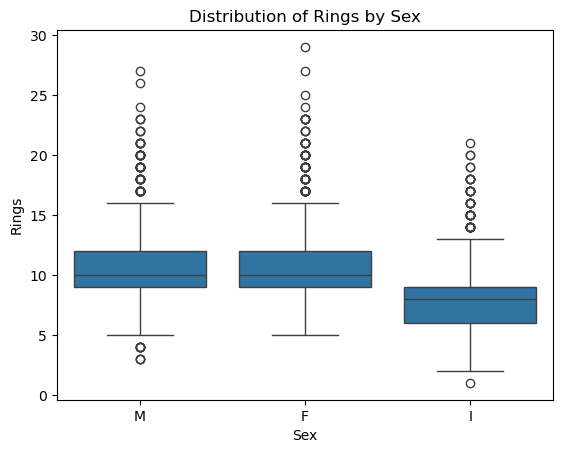

In [21]:
sns.boxplot(x="Sex", y="Rings", data=df)
plt.title("Distribution of Rings by Sex")
plt.show()

<p>The relationship between the categorical feature Sex and the target variable Rings was analyzed using boxplots and grouped summary statistics. The results show that infant abalones have significantly lower ring counts compared to adult males and females. Male and female abalones exhibit similar distributions of Rings, with substantial overlap between the two groups. This indicates that while the Sex attribute contains useful information, it does not provide a clear linear separation with respect to age.</p>

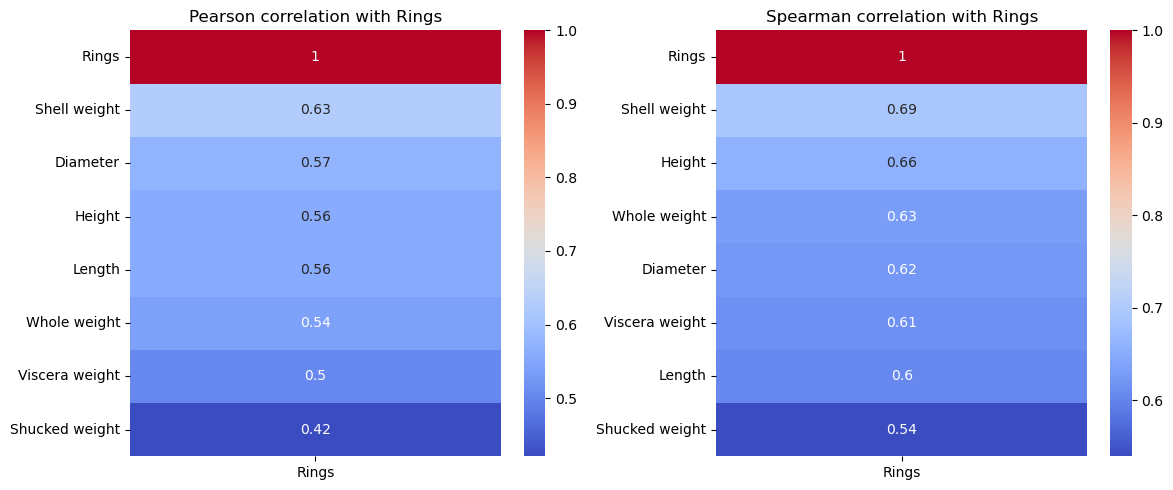

In [22]:
numerical_with_target = df.drop(columns=["Sex"]).columns

pearson_target = (
    df[numerical_with_target]
        .corr(method="pearson")["Rings"]
        .sort_values(ascending=False)
)

spearman_target = (
    df[numerical_with_target]
        .corr(method="spearman")["Rings"]
        .sort_values(ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    pearson_target.to_frame(),
    annot=True,
    cmap="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Pearson correlation with Rings")

sns.heatmap(
    spearman_target.to_frame(),
    annot=True,
    cmap="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Spearman correlation with Rings")

plt.tight_layout()
plt.show()



<p>The correlation analysis shows that the age of an abalone (Rings) has the strongest positive relationship with Shell weight, but other features also play an important role. Several size-based attributes, such as Diameter, Height, and Length, show correlations that are equal to or even higher than some weight-based features like Viscera weight and Shucked weight. This means that both the physical size and overall weight contribute useful information about age. Spearman correlations are slightly higher than Pearson, indicating that the relationships are mostly monotonic rather than perfectly linear.</p>

<h1>2 Data transformation</h1>

<h2>2.1 Outlier handling</h2>

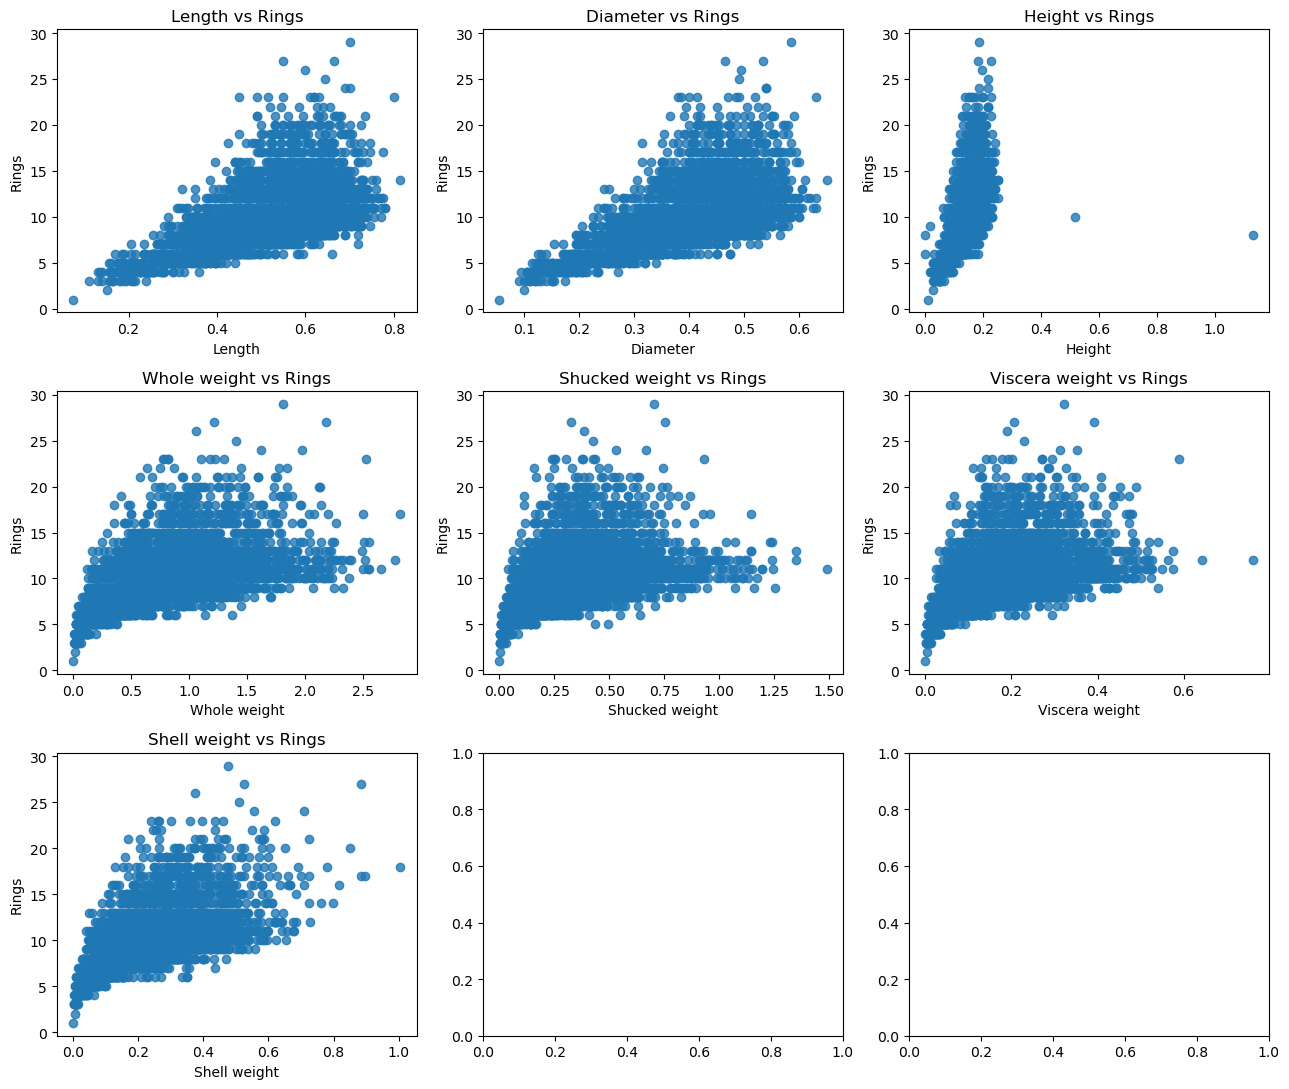

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(13, 11))

for ax, col in zip(axes.flat, numerical_features):
    ax.scatter(df[col], df["Rings"], alpha=0.8)
    ax.set_xlabel(col)
    ax.set_ylabel("Rings")
    ax.set_title(f"{col} vs Rings")

plt.tight_layout()
plt.show()


<p>The Height vs Rings scatterplot shows two clearly suspicious data points that stand out from the rest of the observations. These values are significantly higher than the rest of the dataset and may represent measurement errors or extremely rare abnormal cases. Regardless of the cause, such extreme values can negatively influence the model by distorting the learned relationships and increasing prediction error. Other scatterplots also display some potential outliers, therefore the best practice would be checking for outliers (Z-score, IQR,...) and then based on results decide if we wan't to trim the outliers or cap them.</p>

In [24]:
iqr_columns = [c for c in numerical_features if c != "Height"]

df_iqr = df.copy()

for col in iqr_columns:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

In [25]:
low_h = df_iqr["Height"].quantile(0.01)
high_h = df_iqr["Height"].quantile(0.99)

df_clean = df_iqr[(df_iqr["Height"] >= low_h) & (df_iqr["Height"] <= high_h)]

In [26]:
print("Original rows:", len(df))
print("After cleaning:", len(df_clean))
print("Removed:", len(df) - len(df_clean))

Original rows: 4177
After cleaning: 3949
Removed: 228


In [27]:

df_cap = df.copy()

iqr_cols = [c for c in numerical_features if c != "Height"]

for col in iqr_cols:
    Q1 = df_cap[col].quantile(0.25)
    Q3 = df_cap[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_cap[col] = df_cap[col].clip(lower=lower, upper=upper)


low_h = df_cap["Height"].quantile(0.01)
high_h = df_cap["Height"].quantile(0.99)

df_cap["Height"] = df_cap["Height"].clip(lower=low_h, upper=high_h)



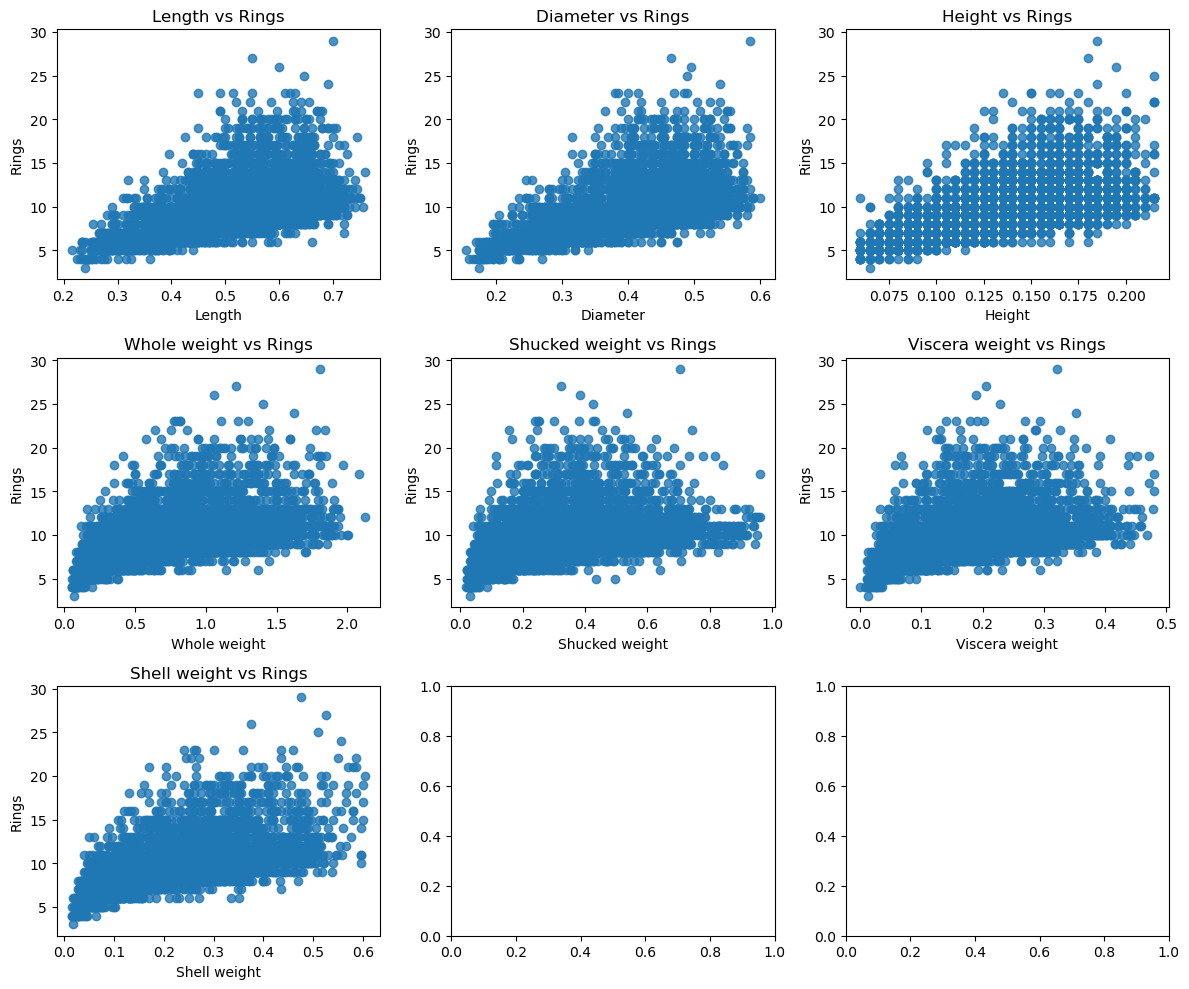

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for ax, col in zip(axes.flat, numerical_features):
    ax.scatter(df_clean[col], df_clean["Rings"], alpha=0.8)
    ax.set_xlabel(col)
    ax.set_ylabel("Rings")
    ax.set_title(f"{col} vs Rings")

plt.tight_layout()
plt.show()

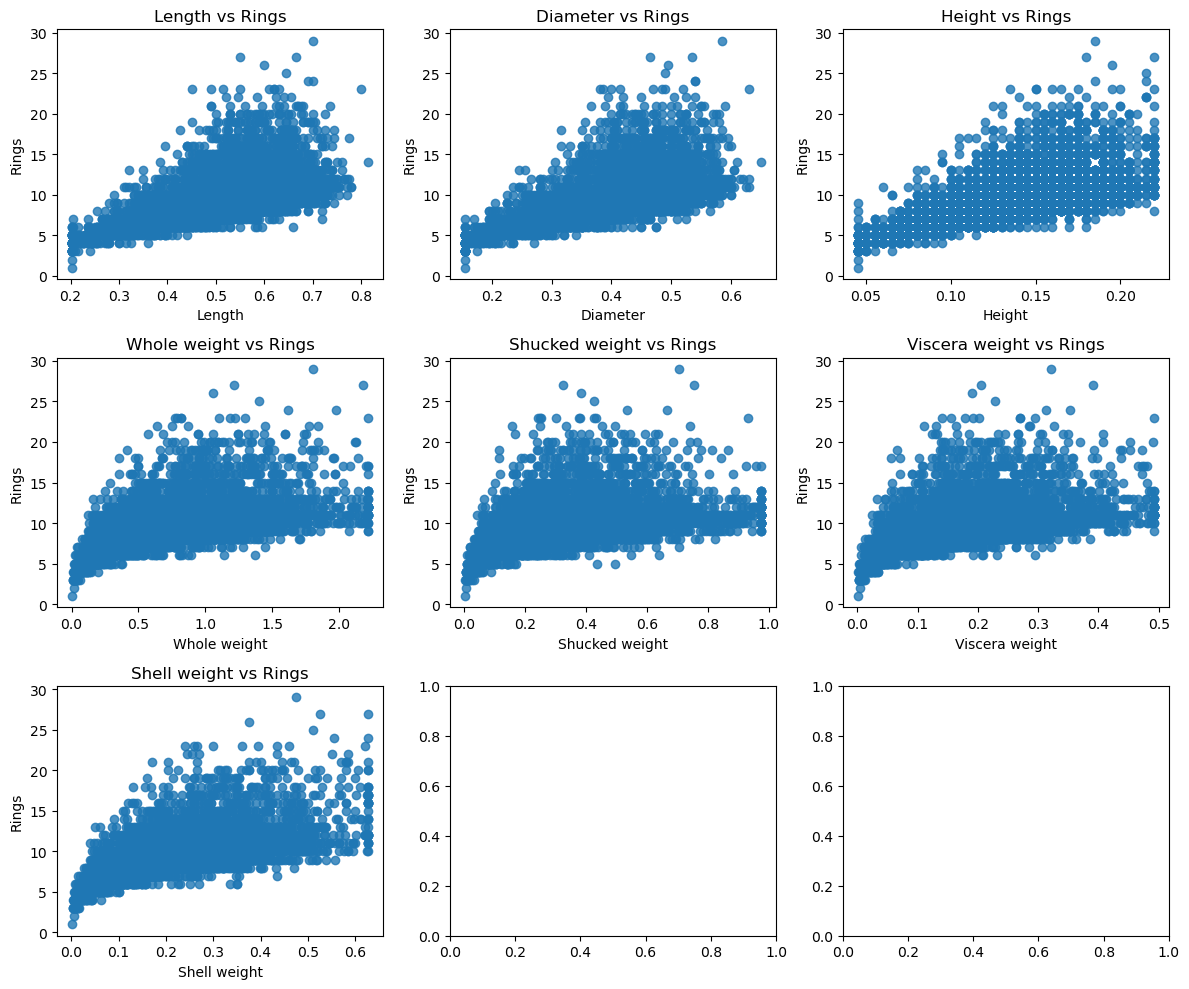

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for ax, col in zip(axes.flat, numerical_features):
    ax.scatter(df_cap[col], df_cap["Rings"], alpha=0.8)
    ax.set_xlabel(col)
    ax.set_ylabel("Rings")
    ax.set_title(f"{col} vs Rings")

plt.tight_layout()
plt.show()

<p>Both trimming and capping were tested as potential outlier-handling strategies. Visual comparison showed that trimming outliers preserves the natural relationships between features and the target variable, while capping introduces artificial boundary effects where values accumulate at capped thresholds. Since the dataset contains only a small number of extreme and suspicious values, removing them leads to cleaner and more realistic patterns without significantly reducing the dataset size. Therefore, the IQR and percentile-based removal approach was selected as the final outlier treatment method.</p>

In [30]:
print("Original rows:", len(df))
print("After trimming:", len(df_clean))
print("Rows removed:", len(df) - len(df_clean))

Original rows: 4177
After trimming: 3949
Rows removed: 228


In [31]:
X = df_clean.drop(columns=["Rings"])
y = df_clean["Rings"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

<p>Based on exploratory analysis, the relationship between the input features and the target variable Rings is mostly monotonic but not perfectly linear, with several features showing clear nonlinear behavior. For this reason, both linear and nonlinear regression models will be tested. Linear Regression and Ridge Regression will serve as baseline models. Support Vector Regression (SVR) will be used to capture smooth nonlinear relationships, while Random Forest and Gradient Boosting models will be applied because tree-based methods are robust, and naturally handle nonlinear patterns. The performance of all models will be compared using MAE, RMSE, and R² metrics.</>

<h1>3 Baseline model</h1>

In [32]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


<p>The preprocess for the pipeline that will be used for all future models consists of a StandardScaler for scaling numerical features and OneHotEncoder for encoding the cateorical feature Sex</p>

In [33]:
from sklearn.compose import TransformedTargetRegressor

baseline_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", TransformedTargetRegressor(
        regressor=LinearRegression(),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

baseline_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [34]:
y_pred = baseline_model.predict(X_test)

mae_pca = mean_absolute_error(y_test, y_pred)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_pca = r2_score(y_test, y_pred)

print("MAE:",mae_pca,) 
print("RMSE:",rmse_pca)
print("R2:",r2_pca)


MAE: 1.647073227584268
RMSE: 2.2859663160516117
R2: 0.47065971872461587


<h1>4 Potential models</h1>

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


models = [
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("Support Vector Regression", SVR(kernel="rbf")),
    ("Random Forest", RandomForestRegressor(
        n_estimators=100,
        random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=3,
        random_state=42))
]

<p>All models were trained on a log-transformed target using TransformedTargetRegressor (log1p forward transform, expm1 inverse transform), which reduces skewness and stabilizes variance of the Rings variable. Predictions are automatically converted back to the original scale for evaluation, improving R² and error stability.</p>

In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

results = []

for name, model in models:
    pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=model,
        func=np.log1p,
        inverse_func=np.expm1
    ))
])
    
    mae_pca = -cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()
    rmse_pca = np.sqrt(-cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean())
    r2_pca = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2").mean()
    
    results.append([name, mae_pca, rmse_pca, r2_pca])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
results_df.sort_values(by="MAE", ascending=True, inplace=True)
results_df


Model       MAE      RMSE        R2
4  Support Vector Regression  1.442898  2.090263  0.532342
6          Gradient Boosting  1.489001  2.156398  0.502860
5              Random Forest  1.510061  2.168763  0.496464
0           Ridge Regression  1.540128  2.173202  0.492914
3                    XGBoost  1.604653  2.306097  0.430440
2              Decision Tree  2.065827  2.978860  0.045043
1           Lasso Regression  2.231930  3.086598 -0.018028

<p>Based on cross-validation performance, Support Vector Regression, Ridge Regression, Gradient Boosting, and Random Forest currently achieve the most competitive results, with MAE around 1.45–1.55 and R² approximately 0.50. Surprisingly, regularized linear models perform almost as well as nonlinear models, which aligns with the EDA observation that relationships between features and Rings are mostly monotonic but not strongly nonlinear. SVR slightly improves average error, while Gradient Boosting and Random Forest already perform well and are expected to benefit significantly from hyperparameter tuning. Decision Tree performs poorly due to overfitting, and is therefore not considered further. Based on these findings, SVR, Ridge, Gradient Boosting, and Random Forest will be selected for hyperparameter tuning and detailed evaluation.</p>

<h1>5 Hyperparameter tuning</h1>

In [37]:
ridge_params = {
    "model__regressor__alpha": [0.001,0.005,0.01, 0.1,0.9, 1,1.1, 5, 10, 50, 100]
}

random_forest_params = {
    "model__regressor__n_estimators": [100, 200, 300],
    "model__regressor__max_depth": [None, 5, 10, 20],
    "model__regressor__min_samples_split": [2, 5, 10],
    "model__regressor__min_samples_leaf": [1, 2, 4],
    "model__regressor__max_features": ["sqrt", "log2"]
}

gradient_boosting_params = {
    "model__regressor__n_estimators": [100, 200, 300],
    "model__regressor__learning_rate": [0.01, 0.05, 0.1],
    "model__regressor__max_depth": [2, 3, 4],
    "model__regressor__subsample": [0.7, 0.9, 1.0],
    "model__regressor__min_samples_split": [2, 5, 10]
}

svr_params = {
    "model__regressor__C": [1, 10, 20],
    "model__regressor__kernel": ["rbf"],
    "model__regressor__epsilon": [0.1, 0.2, 0.3],
    "model__regressor__gamma": ["scale", "auto"],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=Ridge(),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

ridge_search = GridSearchCV(
    ridge_pipe,
    ridge_params,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

ridge_search.fit(X_train, y_train)

print("RIDGE BEST:", ridge_search.best_params_, -ridge_search.best_score_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_forest_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

rf_search = RandomizedSearchCV(
    random_forest_pipe,
    random_forest_params,
    n_iter=150,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("RF BEST:", rf_search.best_params_, -rf_search.best_score_)

In [ ]:
gradient_boosting_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

gb_search = RandomizedSearchCV(
    gradient_boosting_pipe,
    gradient_boosting_params,
    n_iter=150,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    random_state=42
)

gb_search.fit(X_train, y_train)

print("GB BEST:", gb_search.best_params_, -gb_search.best_score_)

In [41]:
from sklearn.model_selection import GridSearchCV

svr_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", TransformedTargetRegressor(
        regressor=SVR(),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

svr_search = GridSearchCV(
    svr_pipe,
    svr_params,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)

svr_search.fit(X_train, y_train)

print("SVR BEST:", svr_search.best_params_, -svr_search.best_score_)


SVR BEST: {'model__regressor__C': 1, 'model__regressor__epsilon': 0.1, 'model__regressor__gamma': 'auto', 'model__regressor__kernel': 'rbf'} 1.4421011051094292


<p>For hyperparameter tuning, GridSearchCV was used for models with a relatively small number of parameters (such as Ridge and SVR), because an exhaustive grid search is computationally feasible and ensures that all combinations are tested. For models with a much larger hyperparameter space such as Random Forest and Gradient Boosting, I used RandomizedSearchCV, which samples a limited number of parameter combinations and is therefore significantly faster while still providing good results. All models were trained using the same pipeline setup as the baseline model. Additionally, n_jobs=-1 was used for the tuning procedures to enable parallel execution, allowing the computations to utilize all available CPU cores and reducing training time</p>

In [ ]:
tuned_results = [
    ("Ridge", -ridge_search.best_score_),
    ("Random Forest", -rf_search.best_score_),
    ("Gradient Boosting", -gb_search.best_score_),
    ("SVR", -svr_search.best_score_),
]

pd.DataFrame(tuned_results, columns=["Model", "Best CV MAE"]).sort_values("Best CV MAE")

<p>All models were tuned using their optimal hyperparameters and evaluated under the same conditions. Among all tested models, the SVR model achieved the best overall results, showing the lowest MAE and the highest R² score. Because of this, SVR was selected as the final model for further analysis</p>

In [43]:
best_svr = svr_search.best_estimator_
best_svr.fit(X_train, y_train)

y_pred = best_svr.predict(X_test)

mae_svr= mean_absolute_error(y_test, y_pred)
rmse_svr= np.sqrt(mean_squared_error(y_test, y_pred))
r2_svr = r2_score(y_test, y_pred)

print("Test Results with SVR:")
print("MAE:", mae_svr)
print("RMSE:", rmse_svr)
print("R2:", r2_svr)

y_pred = best_svr.predict(X_test)

Test Results with SVR:
MAE: 1.5355633638349913
RMSE: 2.1797823497917133
R2: 0.5186936918651399


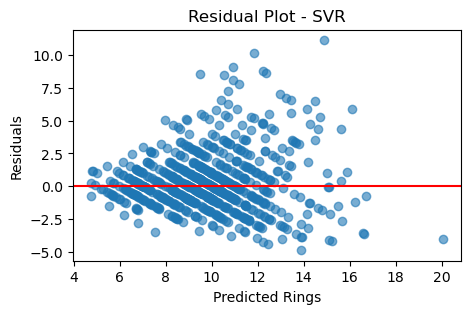

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(5,3))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red")
plt.xlabel("Predicted Rings")
plt.ylabel("Residuals")
plt.title("Residual Plot - SVR")
plt.show()


<p>The residual scatter plot shows that the residuals are mostly centered around zero, indicating that the SVR model does not exhibit strong systematic bias in its predictions. The residuals appear fairly randomly distributed without a clear linear or nonlinear trend, which suggests that the main relationships in the data were successfully captured by the model. However, the spread of residuals increases for larger predicted Rings values, meaning that the model is less accurate for older abalones. This effect is expected because older specimens are fewer in the dataset and biological variability increases with age.</p>

<h1>6 Feature importance</h1>

<h2>6.1 SHAP</h2>

In [45]:
preprocess = best_svr.named_steps["preprocess"]
svr = best_svr.named_steps["model"]

X_train_enc = preprocess.transform(X_train)
X_test_enc = preprocess.transform(X_test)

feature_names = preprocess.get_feature_names_out()

X_train_enc_df = pd.DataFrame(X_train_enc, columns=feature_names)
X_test_enc_df = pd.DataFrame(X_test_enc, columns=feature_names)

In [46]:
import shap
import numpy as np
import warnings

warnings.filterwarnings("ignore", message="X has feature names")

background = X_train_enc_df.sample(5, random_state=42)
explainer = shap.Explainer(svr.predict, background)
X_explain = X_test_enc_df.sample(15, random_state=42)
shap_values = explainer(X_explain)

shap_values_df=pd.DataFrame(shap_values.values,columns=feature_names)


ExactExplainer explainer: 16it [00:11,  1.89s/it]                        


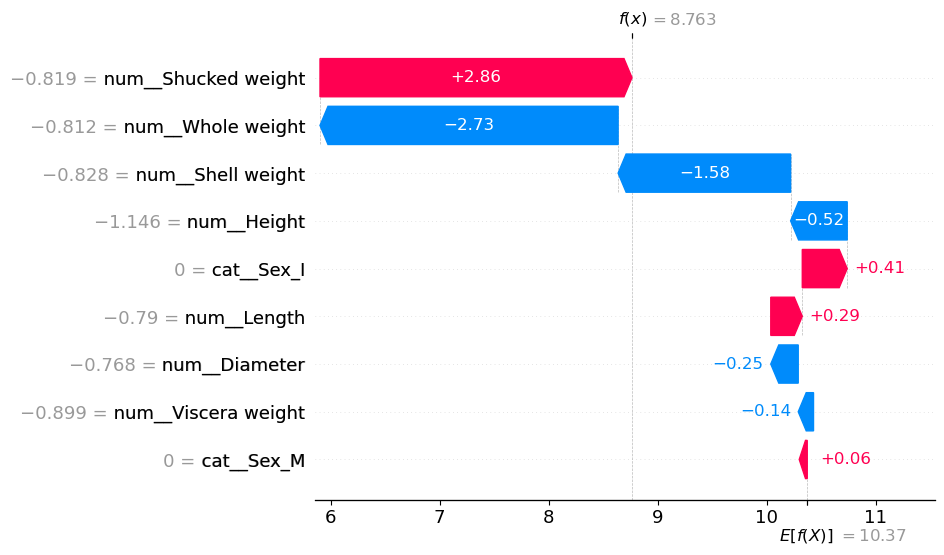

In [47]:
shap.plots.waterfall(shap_values[5])


In [48]:
shap.initjs()
shap.plots.force(shap_values[5])

<p>The SHAP waterfall and force plots illustrate how each feature contributes to the final prediction for a specific abalone instance. The baseline value E[f(X)] (shown as the base value in the force plot) represents the average predicted number of rings across the entire dataset. Features shown in blue decrease the prediction relative to this baseline, while features shown in red increase it. The length of each bar indicates the magnitude of the SHAP value, meaning how strongly that feature influenced the prediction. The plots also display the actual feature values used for this instance, making it clear which physical characteristics caused the prediction to move upward or downward. When all positive and negative contributions are combined with the baseline, they result in the final predicted number of rings for that abalone.</p>

In [49]:
shap.initjs()
shap.plots.force(shap_values)

<p>The SHAP force plot for all instances gives a global picture of how the model pushes predictions above or below the baseline across the entire dataset. On the x-axis we have individual abalone predictions, while the y-axis represents how much each prediction moves away from the average (baseline) value. Taking the single-instance force plot, rotating it 90 degrees, and doing that for every prediction, creates the force plot for all instances. When all of those rotated plots are placed next to each other, we get the full force plot that shows how the model behaves for all samples.</p>

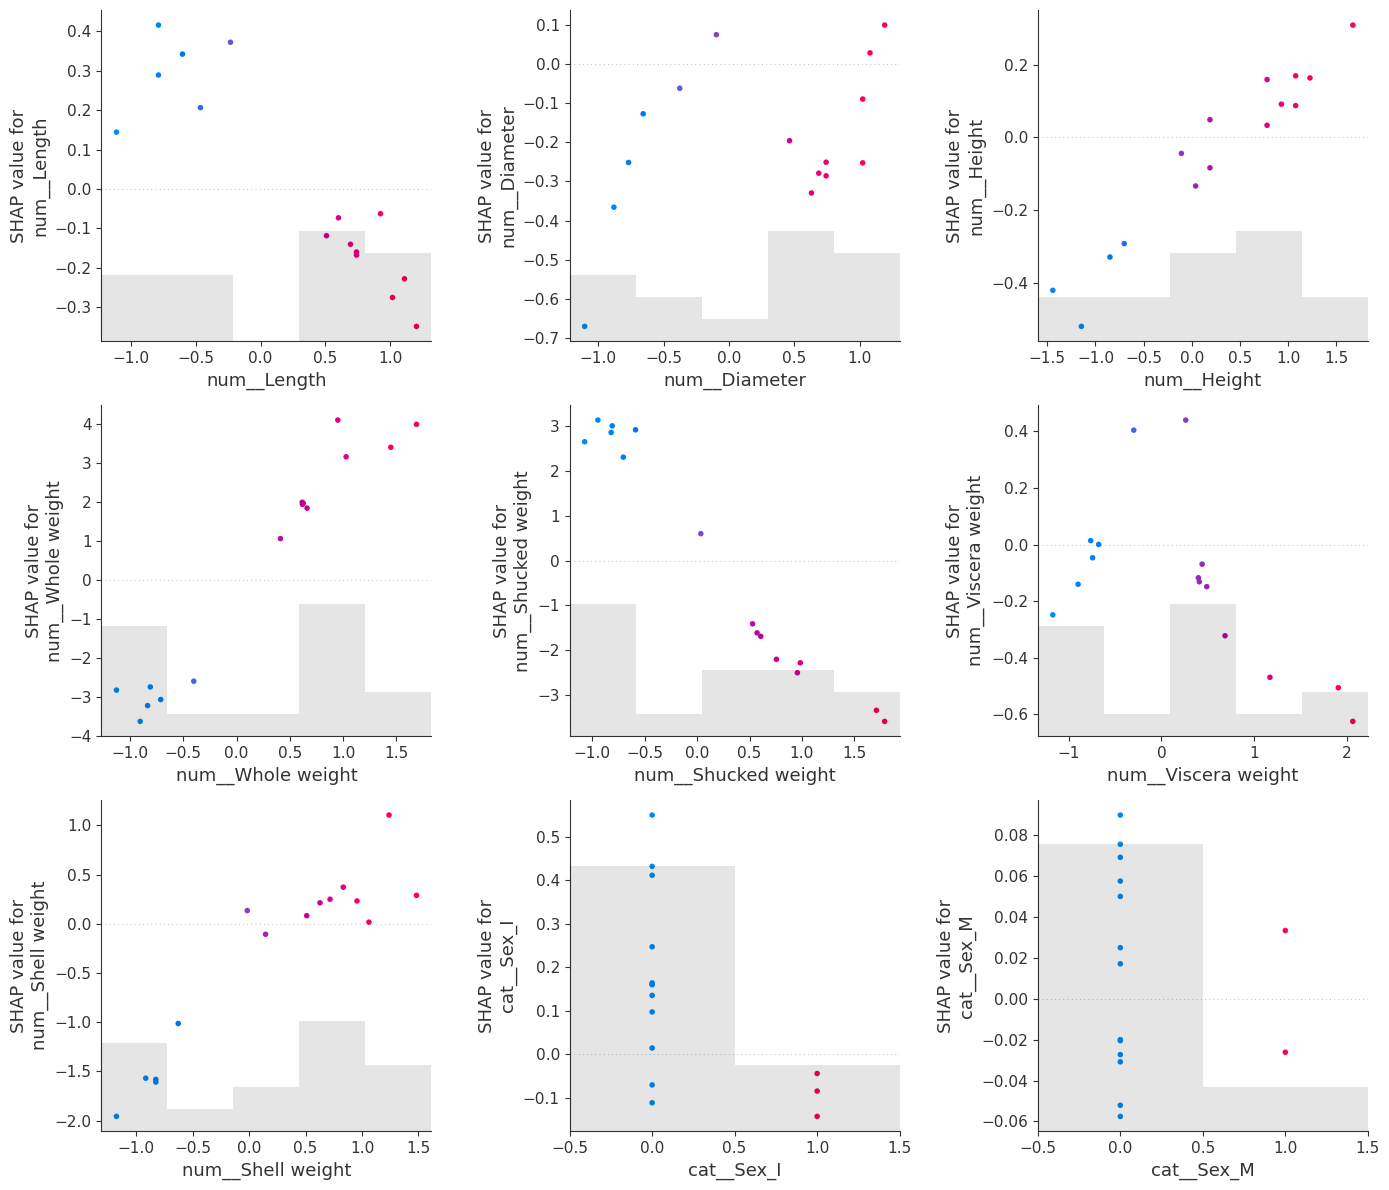

In [50]:
names = list(shap_values.feature_names)

fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.flatten()

for i, feat in enumerate(names):        
    shap.plots.scatter(
        shap_values[:, i],
        ax=axes[i],
        show=False,
        color=shap_values[:,i]
    )

plt.tight_layout()
plt.show()

<p>The SHAP dependence plots for most numerical features (Length, Shell Weight, Whole Weight, Viscera Weight) show predominantly positive monotonic behavior, meaning that larger abalones generally receive higher predicted ring counts. This supports the biological intuition that older abalones are typically larger.

However, not all features behave strictly monotonically. Shucked weight exhibits a more complex relationship, where increasing its value sometimes decreases the predicted age.</p>

<p>Length

Unexpectedly, as Length increases, SHAP values mostly move into the negative region. This means longer abalones generally decrease the predicted number of rings.

Diameter

Smaller diameters reduce predicted age (negative SHAP), while larger diameters strongly increase it, confirming that wider abalones are typically older.

Height

Height also shows a mostly positive upward pattern.
Higher height values lead to higher SHAP contributions, meaning taller shell height helps the model predict more rings. Some variability remains, suggesting interactions with other features.

Whole Weight

This is one of the strongest monotonic predictors.
Low whole weight clearly reduces age prediction, while high whole weight sharply increases it. This indicates total mass is a major factor in estimating maturity/age.

Shucked Weight

Shucked weight clearly shows the opposite effect compared to most other size features.
Higher shucked weight values mostly decrease the predicted age (negative SHAP), while lower values can slightly increase it. This suggests a complex non-linear relationship and interaction with other weight-based features, higher shucked mass alone doesn’t always signal older age.

Viscera Weight

Viscera weight behaves similarly to shucked weight but with a bit more spread.
Higher values push predictions downward while lower values push upward. This again hints at interaction effects and the idea that internal mass growth is not a simple linear indicator of age.

Shell Weight

Shell weight is one of the clearest and strongest predictors.
Low values strongly decrease predicted age (big negative SHAP), while high shell weight produces strong positive SHAP values. This makes biological sense because shell material accumulates gradually over time.

Sex I 

Being Infant mostly contributes small negative SHAP values, meaning infants are slightly pushed toward “younger” predictions.
However, variation exists because its effect still depends on body size and weight.

Sex M 

Being Male has a relatively weak influence overall.
Most SHAP values are small and clustered near zero, meaning Sex_M does not strongly control predictions — it only slightly adjusts them depending on the context of size-related features.</p>

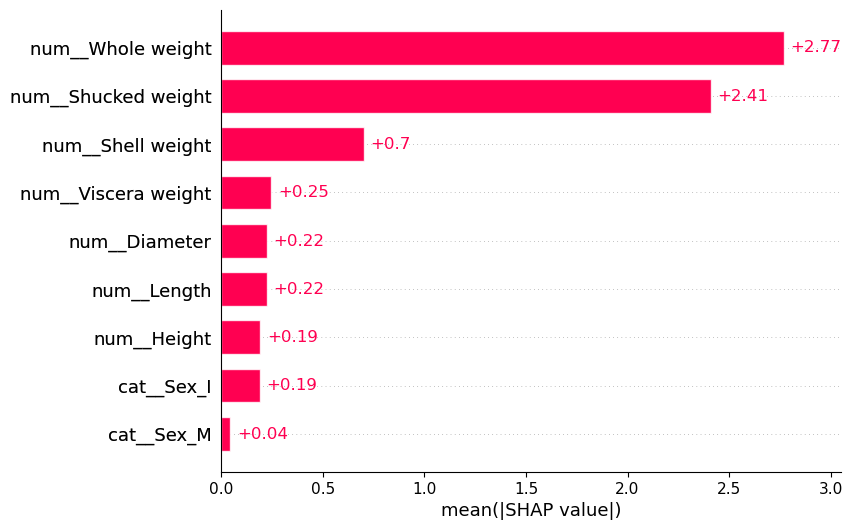

In [51]:
shap.plots.bar(shap_values)

<p>The SHAP bar plot summarizes the average absolute contribution of each feature across all predictions, ranking them by overall importance. The plot clearly shows that size and weight-related attributes dominate the model’s decision-making process, especially shell weight, whole weight, and shucked weight. These features consistently contribute the most to deviations from the baseline prediction, confirming that physical weight characteristics are the primary indicators of abalone age. Meanwhile, categorical Sex features appear near the bottom of the ranking together with size related numerical features, indicating that although they influence predictions, their impact is significantly smaller compared to the numerical weight metrics.</p>

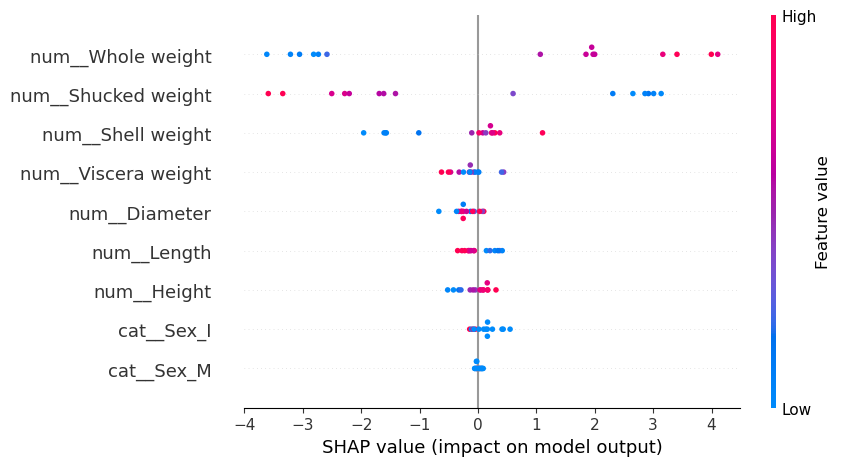

In [52]:
shap.plots.beeswarm(shap_values)

<p>The SHAP beeswarm plot shows how each feature influences the model’s prediction of the number of rings. Features are sorted by importance from top to bottom, and each dot represents one instance. Values on the x-axis show whether a feature pushes the prediction higher (positive SHAP value) or lower (negative SHAP value), while the color indicates whether the feature value is high (red) or low (blue).

We can clearly see that the different weight-related features (Whole weight, Shucked weight, Shell weight, Viscera weight) have the strongest impact on the model. Higher values of these features generally push the prediction toward a higher number of rings, while lower values reduce the predicted age. Other features such as Length, Height, and Diameter also contribute, but to a smaller extent. Categorical sex features have a relatively minor effect compared to the numeric physical measurements.

Overall, this beeswarm plot confirms the same conclusions we observed earlier in the scatter and dependency plots: heavier and generally larger abalones tend to be predicted as older, and these physical characteristics are the most influential for the model.
</p>

<h2>6.2 LIME</h2>

In [53]:
from lime.lime_tabular import LimeTabularExplainer
from IPython.display import HTML, display

svr_model = svr_search.best_estimator_

preproc = svr_model.named_steps["preprocess"]
regressor = svr_model.named_steps["model"]  

X_train_num = preproc.transform(X_train)
feature_names = preproc.get_feature_names_out()


explainer_lime = LimeTabularExplainer(
    training_data=X_train_num,
    feature_names=feature_names,
    mode="regression"
)

sample = X_test.iloc[[5]]             
sample_num = preproc.transform(sample) 


exp = explainer_lime.explain_instance(
    data_row=sample_num[0],
    predict_fn=regressor.predict  
)

raw_html = exp.as_html()

styled_html = f"""
<style>
svg text {{
    fill: white;
}}
</style>
{raw_html}
"""

display(HTML(styled_html))


<p>The LIME explanation shows how individual features influenced the model’s prediction for this specific abalone example. The features on the right (positive side) are those that increased the predicted number of rings, while the features on the left (negative side) pushed the prediction lower.

For this instance, higher Whole weight and Shell weight contributed the most to increasing the predicted age, while features such as Shucked weight, Length, Viscera weight, and Diameter slightly reduced the prediction. The categorical sex variables also had a very small effect compared to the physical measurements.

Overall, LIME confirms the same pattern we observed with SHAP: heavier and generally larger abalones tend to be predicted as older, and weight-related features are the most influential in the model’s decision.</p>

<h3>6.2.1 LIME aggregations</h3>

In [54]:
def get_weights(exp):
    exp_list=exp.as_map()[1]
    exp_list=sorted(exp_list,key=lambda x:x[0])
    exp_weight=[x[1] for x in exp_list]

    return exp_weight

In [55]:
weights = []

for i in range(20):
    row = X_test.iloc[[i]]                         
    row_num = preproc.transform(row)               
    
    exp = explainer_lime.explain_instance(
        data_row=row_num[0],
        predict_fn=regressor.predict
    )

    weights.append(get_weights(exp))


In [56]:
lime_weights_df = pd.DataFrame(
    data=weights,
    columns=feature_names
)

lime_weights_df.head()


num__Length  num__Diameter  num__Height  num__Whole weight  \
0     0.036699      -0.563428    -0.203644          -4.413361   
1    -0.040407       0.221807    -0.157535           1.404840   
2     0.026463       0.231480     0.347411           1.046401   
3    -0.022704      -0.261979     0.676416           5.228346   
4    -0.098500       0.228137    -0.186667           1.579795   

   num__Shucked weight  num__Viscera weight  num__Shell weight  cat__Sex_I  \
0             4.660326             0.649854          -1.888125    0.182490   
1            -3.653092            -0.442835           0.720553    0.263305   
2            -1.980378            -0.244717           0.560517    0.124926   
3            -1.777613            -0.267398           1.433819    0.174778   
4            -2.173081             0.253243           0.833492   -0.006176   

   cat__Sex_M  
0    0.056667  
1    0.044079  
2    0.046972  
3   -0.177459  
4    0.059192

<h4>6.2.1.1 Absolute mean</h4>

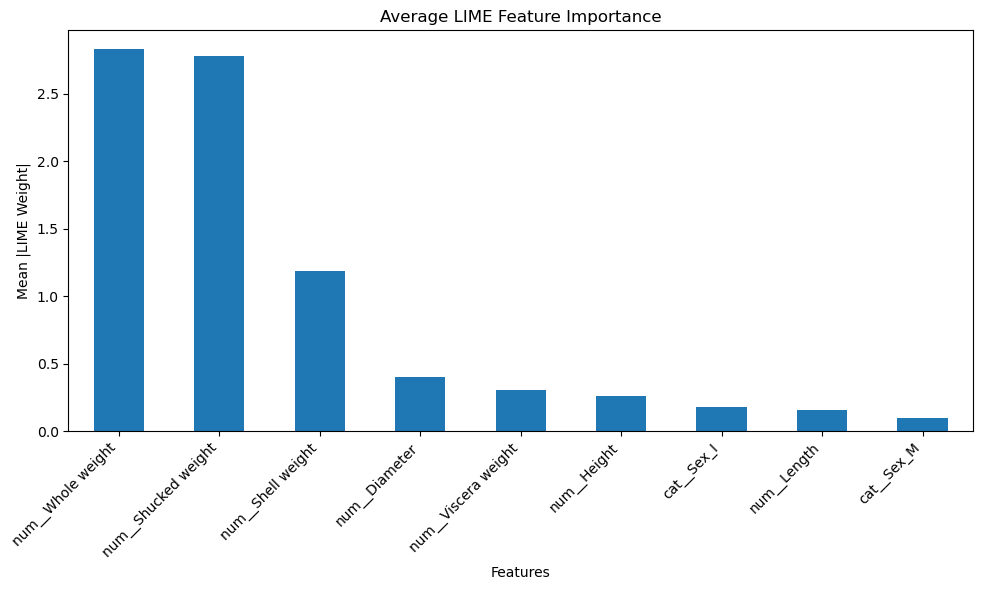

In [57]:
mean_importance = lime_weights_df.abs().mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
mean_importance.plot(kind="bar")

plt.title("Average LIME Feature Importance")
plt.ylabel("Mean |LIME Weight|")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<p>The bar plot shows the average absolute LIME weights for each feature, which represents how strongly each feature contributes to the model’s predictions across multiple instances. Higher values indicate features that consistently have a larger influence (either positive or negative) on the predicted number of rings.</p>

<p>From the plot, it is clear that Whole weight and Shucked weight are by far the most influential features in the model, followed by Shell weight. These three weight-related attributes dominate the explanation, meaning the model relies heavily on the overall mass of the abalone when estimating its age. Diameter and Viscera weight have noticeably smaller but still relevant contributions. The remaining features such as Height, Length, and the Sex indicators have only minor influence compared to the weight features.</p>

<h4>6.2.1.2 Feature trends</h4>

In [58]:
N = len(lime_weights_df)
X_subset = X_test.iloc[:20]
X_subset_num = preproc.transform(X_subset)

X_num_df = pd.DataFrame(
    X_subset_num,
    columns=feature_names
)

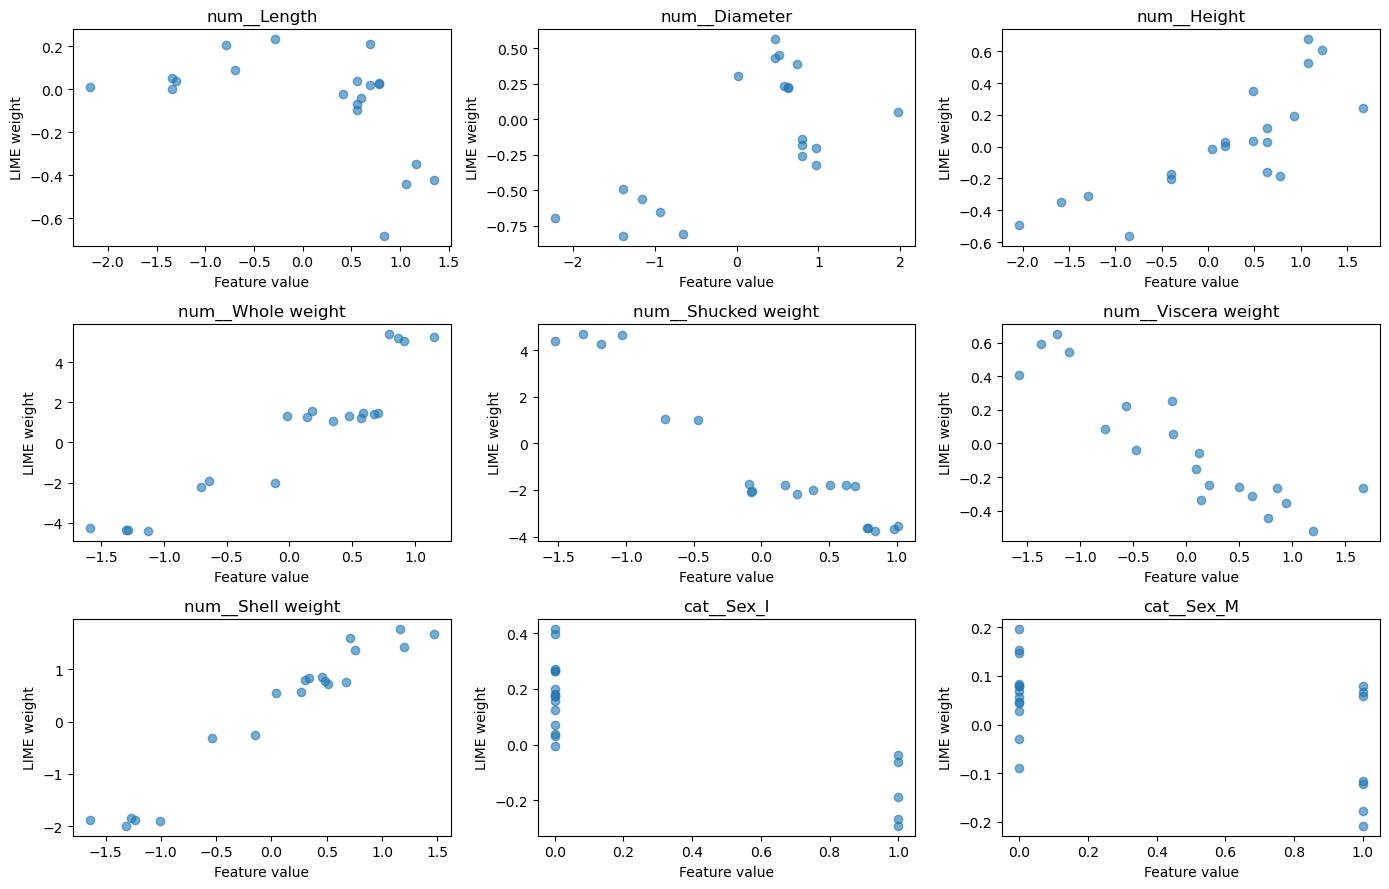

In [59]:
features = feature_names
fig, axes = plt.subplots(3, 3, figsize=(14, 9))
axes = axes.flatten()

for i, feat in enumerate(features):
    axes[i].scatter(
        X_num_df[feat],
        lime_weights_df[feat],
        alpha=0.6
    )
    axes[i].set_title(feat)
    axes[i].set_xlabel("Feature value")
    axes[i].set_ylabel("LIME weight")
plt.tight_layout()

<p>Length

As length increases, the LIME weights tend to become slightly more negative, meaning longer abalones can sometimes slightly reduce the predicted number of rings.

Diameter

Higher diameter values generally correspond to more positive LIME weights, indicating that wider abalones tend to increase the predicted age.

Height

There is a clear positive pattern: greater height leads to higher LIME contributions, so taller abalones push the prediction upward.

Whole weight

Whole weight shows a very strong separation, where low weights significantly decrease the prediction and high weights strongly increase it, confirming it as one of the most influential features.

Shucked weight

Shucked weight shows the opposite tendency to whole weight for these instances, where higher values often push the prediction downward and lower ones increase it.

Viscera weight

Higher viscera weight is mostly associated with negative LIME weights, meaning abalones with more viscera mass tend to receive slightly lower predicted ring counts.

Shell weight

Shell weight has a clear positive relationship with LIME weight, so heavier shells consistently lead the model to predict more rings.

Sex I

Samples classified as Infant generally have negative LIME contributions, meaning this category normally decreases the predicted age.

Sex M

Male abalones show mostly small, and clustered near zero LIME values, meaning Sex_M does not strongly control predictions, suggesting sex has a relatively minor effect compared to the weight-related features.</p>

<h1>7 Dimensionality Reduction</h1>

<h2>7.1 PCA</h2>

In [ ]:
from sklearn.decomposition import PCA

tuned_svr=SVR(C=svr_search.best_params_['model__regressor__C'],
                epsilon=svr_search.best_params_['model__regressor__epsilon'],
                gamma=svr_search.best_params_['model__regressor__gamma'],
                kernel=svr_search.best_params_['model__regressor__kernel'])

pca_num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
])

cat_pipeline = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

pre_pca = ColumnTransformer([
    ("num", pca_num_pipeline, numerical_features),
    ("cat", cat_pipeline, ["Sex"])
])

In [68]:
model_pca = Pipeline([
    ("preprocess", pre_pca),
    ("svr", tuned_svr)
])

In [69]:
param_grid = {
    "preprocess__num__pca__n_components": [2, 3, 4, 5, 6, 7]
}

pca_search = GridSearchCV(
    estimator=model_pca,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

pca_search.fit(X_train, y_train)

print("Best PCA components:", pca_search.best_params_)
print("Best CV MAE:", -pca_search.best_score_)


Best PCA components: {'preprocess__num__pca__n_components': 7}
Best CV MAE: 1.4729733373334581


In [70]:
best_pca_model = pca_search.best_estimator_

y_pred = best_pca_model.predict(X_test)

mae_pca = mean_absolute_error(y_test, y_pred)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_pca = r2_score(y_test, y_pred)

print("Test Results with PCA:")
print("MAE:", mae_pca)
print("RMSE:", rmse_pca)
print("R2:", r2_pca)

Test Results with PCA:
MAE: 1.522187682649563
RMSE: 2.208933431281182
R2: 0.505734216570209


In [86]:
print("Non-PCA vs PCA Results:")
print("MAE:", mae_pca-mae_svr)
print("RMSE:", rmse_pca-rmse_svr)
print("R2:", r2_pca-r2_svr)

print("\n")

print("Relative Non-PCA vs PCA Results (%):")
print("MAE %:", 100 * (mae_pca - mae_svr) / mae_svr)
print("RMSE %:", 100 * (rmse_pca - rmse_svr) / rmse_svr)
print("R2 %:", 100 * (r2_pca - r2_svr) / r2_svr)

Non-PCA vs PCA Results:
MAE: -0.013375681185428201
RMSE: 0.029151081489468655
R2: -0.012959475294930911


Relative Non-PCA vs PCA Results (%):
MAE %: -0.8710601920081708
RMSE %: 1.3373390922380006
R2 %: -2.4984833049213884


<p>PCA was applied to the numerical feature set to reduce redundancy and evaluate whether dimensionality reduction could improve the performance of the SVR model. Several PCA dimensionalities were tested using cross-validation, and the best-performing configuration was evaluated on the test data.

The PCA-based model achieved a slightly lower MAE, meaning that the average prediction error decreased marginally. However, RMSE increased and R² decreased compared to the original SVR model. This indicates that, although typical errors became slightly smaller, the model made larger mistakes on some samples and overall explained less variance in the target variable.

Since the dataset is not high-dimensional and already contains meaningful features, PCA compressed useful structure along with noise. Therefore, dimensionality reduction did not improve performance in this case, and the original SVR model remains the better choice</p>

In [72]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", SelectFromModel(Lasso(max_iter=20000, random_state=42))),
    ("model", tuned_svr)
])

param_grid = {
    "select__estimator__alpha": np.logspace(-4, 0, 15),
    "select__threshold": ["mean", "median", 0.0, 1e-4, 1e-3, 1e-2]
}

search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV MAE:", -search.best_score_)


Best params: {'select__estimator__alpha': 0.01, 'select__threshold': 'median'}
Best CV MAE: 1.4601156853686654


In [ ]:
best_selector = search.best_estimator_.named_steps["select"]
mask = best_selector.get_support()

feature_names = search.best_estimator_.named_steps["preprocess"].get_feature_names_out()

selected_features = feature_names[mask]

print("Original feature count:", len(feature_names))
print("Selected feature count:", len(selected_features))

print("Selected features: \n")
for f in selected_features:
    print(f)


Original feature count: 9
Selected feature count: 5
Selected features: 

num__Whole weight
num__Shucked weight
num__Viscera weight
num__Shell weight
cat__Sex_I


In [ ]:
best_lasso_pipe = search.best_estimator_

best_lasso_pipe.fit(X_train, y_train)

y_pred_lasso = best_lasso_pipe.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nTest Results with SVR + Lasso Feature Selection:")
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)



Test Results with SVR + Lasso Feature Selection:
MAE: 1.529566392488255
RMSE: 2.211299151014579
R2: 0.5046749538099595


In [83]:
print("Non-Lasso vs Lasso Results:")
print("MAE:", mae_lasso-mae_svr)
print("RMSE:", rmse_lasso-rmse_svr)
print("R2:", r2_lasso-r2_svr)

print("\n")

print("Relative changes:")
print("MAE %:", 100 * (mae_lasso - mae_svr) / mae_svr)
print("RMSE %:", 100 * (rmse_lasso - rmse_svr) / rmse_svr)
print("R2 %:", 100 * (r2_lasso - r2_svr) / r2_svr)

Non-Lasso vs Lasso Results:
MAE: -0.005996971346736268
RMSE: 0.03151680122286571
R2: -0.01401873805518039


Relative changes:
MAE %: -0.3905388398795305
RMSE %: 1.4458691816583094
R2 %: -2.7027007027541132


<p>Lasso was applied as a feature selection method to reduce the dimensionality of the dataset while preserving the original feature representation. By introducing L1 regularization, Lasso forces less informative and redundant features to have zero coefficients, effectively selecting a subset of the original features. Different regularization strengths and selection thresholds were evaluated using cross-validation, and the best configuration was tested on the held-out test set.

The SVR model trained on the Lasso-reduced feature set achieved performance comparable to the original SVR model. Differences in MAE, RMSE, and R² were minimal, with RMSE showing a slight improvement, while MAE and R² changed marginally. This indicates that Lasso successfully removed redundant features without significantly affecting predictive accuracy.

Since Lasso preserves the original feature space and performs feature selection rather than feature transformation, the resulting model remains interpretable while operating on a lower-dimensional input. Therefore, Lasso proved to be an effective dimensionality-reduction technique for this dataset, achieving reduced complexity with negligible impact on model performance.</p>